This is a Calssification problem based on the details of a suburb. We are trying to predict if a given suburb in Boston, will have crime rate below or above the median of crime rate. 
I have used Logistic Regression, since the scope of the project is to learn about it. 

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading file
my_path = '/Users/anithakanna/Downloads'
my_df = pd.read_csv(f'{my_path}/Boston.csv')
print(my_df.shape)
my_df.head(2)

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [3]:
#We want to predict if a given suburb has crime rate above or below the median.So splitting X and Y
Y = my_df["crim"]
X = my_df.drop(["crim"],axis = 1)

print(X.shape,Y.shape)
X.head(2)

(506, 13) (506,)


,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


 row_1 = X.iloc[1] 
row_1

X1=my_df[['nox','rad']]
X1.head()

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [5]:
#Crime will be 1 if it is above median(0.255)and will be 0 if its below median.
import numpy as np
x=np.array(Y)
x[x>0.25]=1
x[x<0.25]=0
x1=x.astype(int)
x1.shape

(506,)

In [6]:
#putting the array into a dataframe for future use and naming it as Y_new
Y_new=pd.DataFrame(x1)

Y_new

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [7]:
Y_new.shape

(506, 1)

Data Exploration

In [8]:
#counting the values belonging to 0 and 1 category
from sklearn import preprocessing
import numpy as np
x2=pd.value_counts(pd.Series(x1))
x2

1    256
0    250
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

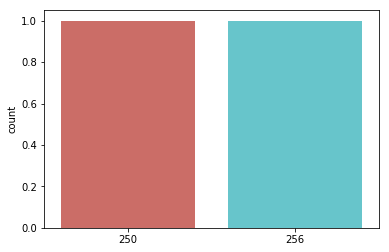

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.countplot(x=x2,data=Y_new,palette='hls')
plt.show


So the dataset is balanced. 

In [10]:
df_list=[Y_new,X]
Full_df=pd.concat(df_list,axis=1)
Full_df

,0,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [11]:
Full_df1=Full_df.rename(index=str,columns={0:"y"})

In [12]:
Check=Full_df1.groupby('y').mean()
Check

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
y,,,,,,,,,,,,,
0,21.7840,6.976720,0.052000,0.470699,6.403580,50.943200,5.096016,4.164000,306.156000,17.902400,388.639560,9.291040,25.036400
1,1.1875,15.199336,0.085938,0.636723,6.168477,85.793359,2.524561,14.808594,507.925781,18.995703,325.457695,15.936289,20.087891


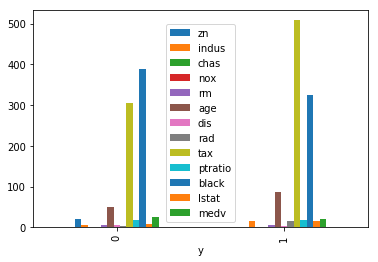

In [13]:
Check.plot.bar()

Note:We can see that black and tax have relatively higher range of values. So we can take a log and scale them. 

Observations:
1. (zn) Higher the proportion for residential area lower the crime->Lots of people around so crime rate decreases.
2. (indus) Higher the proportion of business land higher the crime->Not many people living around,easy to commit a crime
3. (age) Higher the age more the crime-> older people are prone to crime attack
4. (rad) Further from highway more the crime.
5. (tax) More tax value higher the crime
6. (black) Higher the black ratio lower the crime


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f983d68>,
      dtype=object)

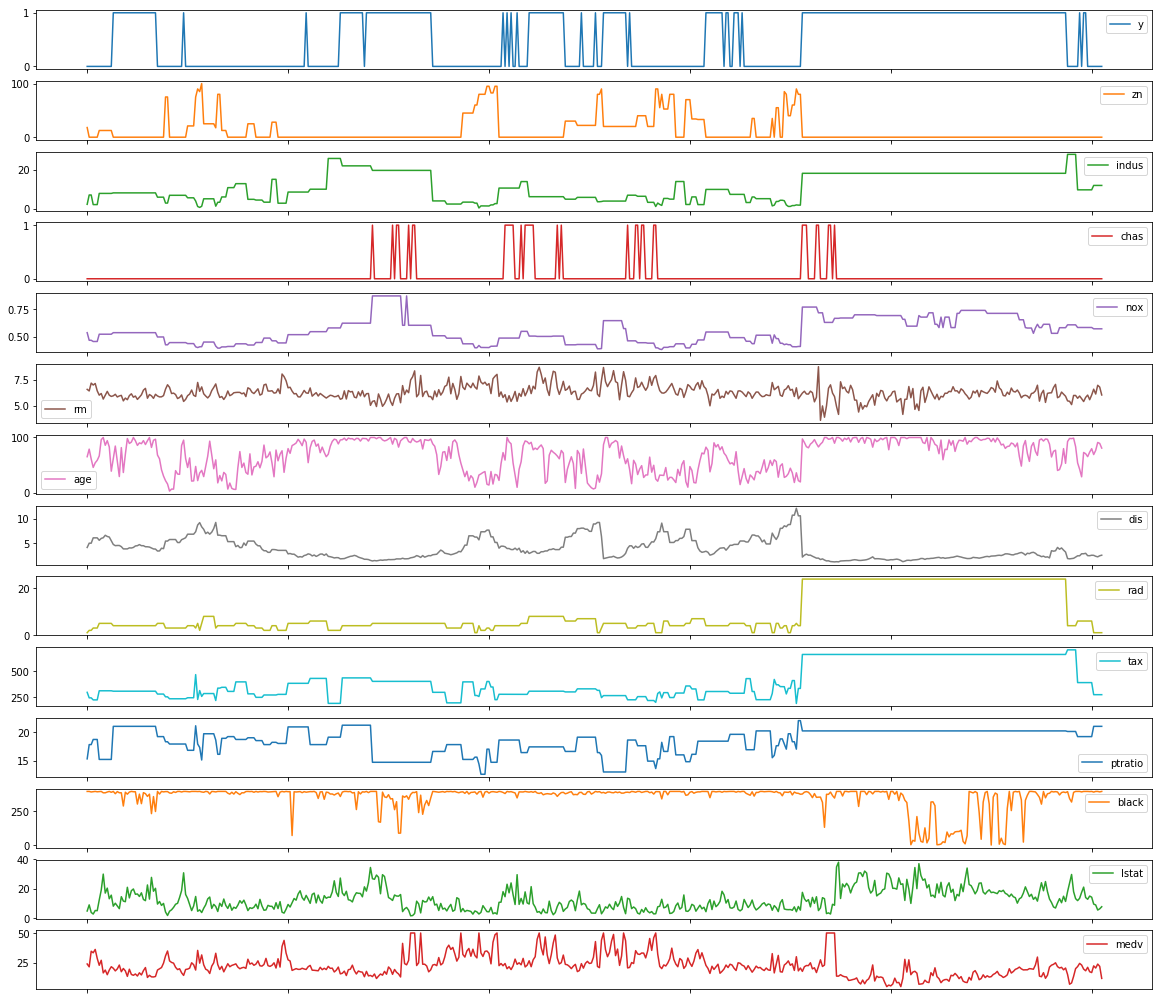

In [14]:
Full_df1.plot(subplots=True,figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f6d2cc0>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

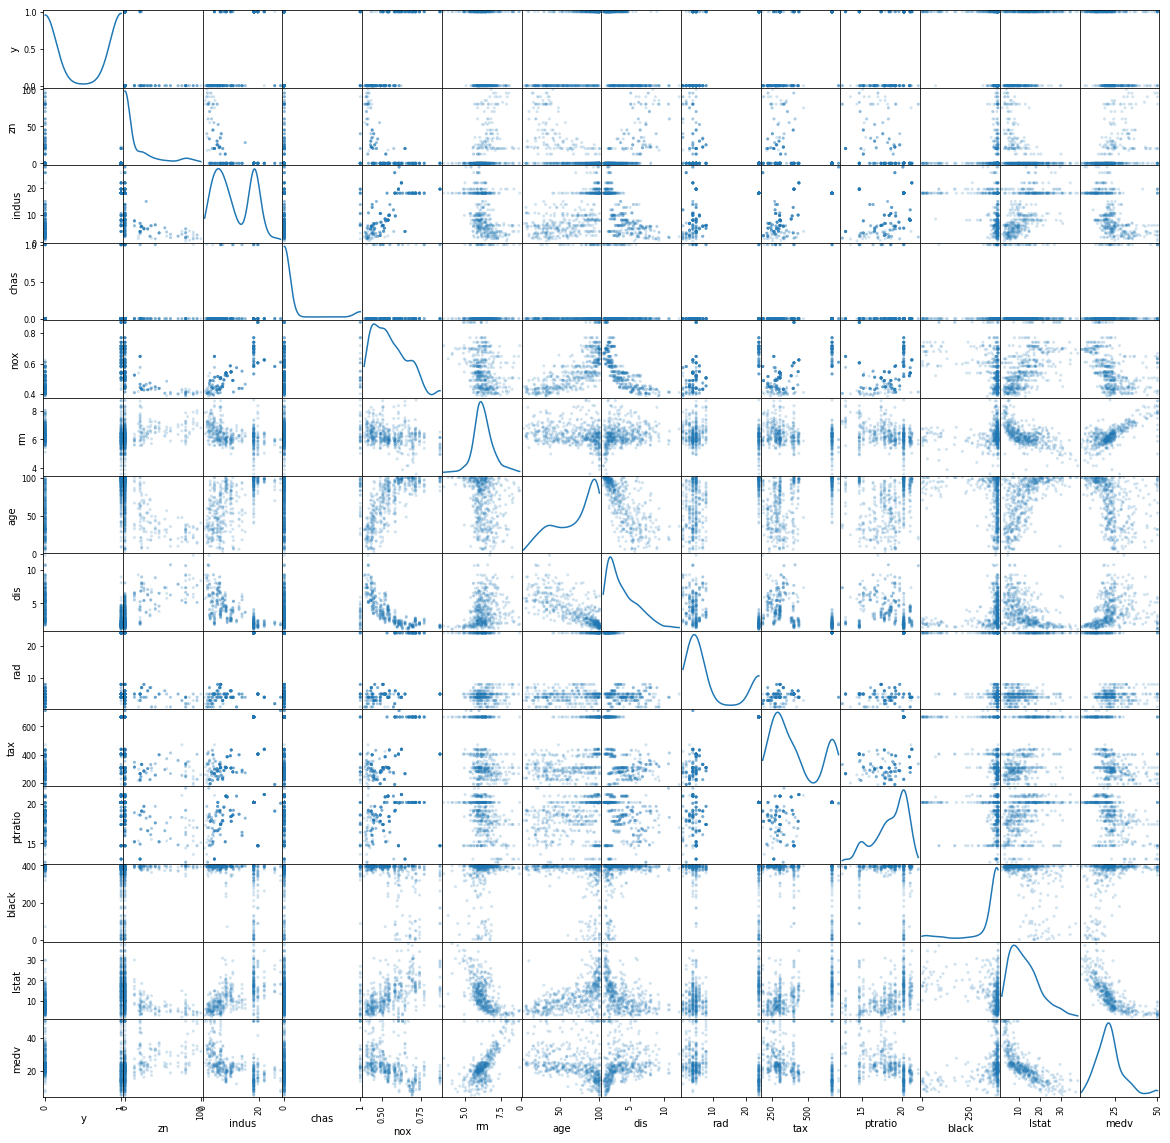

In [15]:
from pandas.plotting import scatter_matrix
plt.figure();
#To see distribution of data (in bar format)in the entire dataframe
#Full_df1.plot.bar()
#To see distribution of data (in hist format)in the entire dataframe
#Full_df1.plot.hist(alpha=0.5,stacked=True,bins=20)
#To plot histogram for single feature
#Full_df1['zn'].diff().hist()
#To see the value range of entire datframe
#Full_df1.plot.box()
#To check individual feature box plot
#Full_df1.boxplot(column=['zn','indus','chas'])
#To see the realtion of all features with all features
scatter_matrix(Full_df1,alpha=0.2,figsize=(20,20),diagonal='kde')

Data Visualizations

Lets analyse the data to find what affects the outcome factor and what doesnt.

 *zn*

Text(0, 0.5, 'Frequency of Crime')

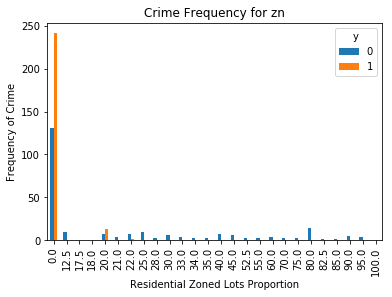

In [16]:
#Scatter1=Full_df1.plot.scatter(x='zn',y='y',c='purple')
#Scatter1
%matplotlib inline
pd.crosstab(Full_df1.zn,Full_df1.y).plot(kind='bar')
plt.title('Crime Frequency for zn')
plt.xlabel('Residential Zoned Lots Proportion')
plt.ylabel('Frequency of Crime')



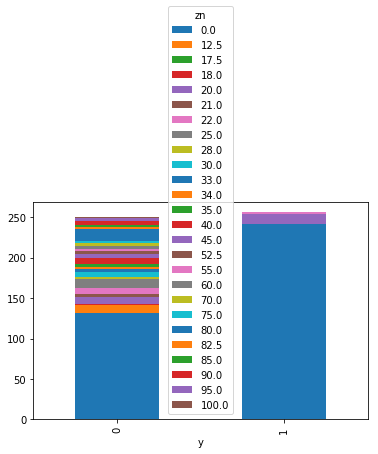

In [17]:
znbar = Full_df1.groupby(['y', 'zn'])['y'].count().unstack('zn')

znbar.plot(kind='bar', stacked=True)

Zn value impacts the outcome when it is higher
No outliers

 *indus*

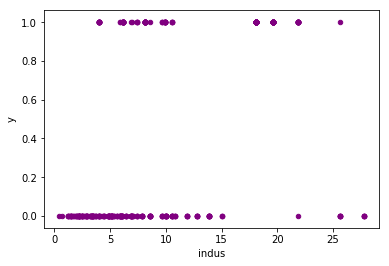

In [18]:
Scatter2=Full_df1.plot.scatter(x='indus',y='y',c='purple')
Scatter2

Text(0, 0.5, 'Frequency of Crime')

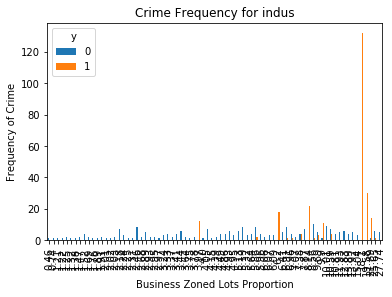

In [19]:
#indusbar = Full_df1.groupby(['y', 'indus'])['y'].count().unstack('indus')
#indusbar.plot(kind='bar', stacked=True)

%matplotlib inline
pd.crosstab(Full_df1.indus,Full_df1.y).plot(kind='bar')
plt.title('Crime Frequency for indus')
plt.xlabel('Business Zoned Lots Proportion')
plt.ylabel('Frequency of Crime')

Indus seems to hold a good relationship but not strong enough.

*chas*

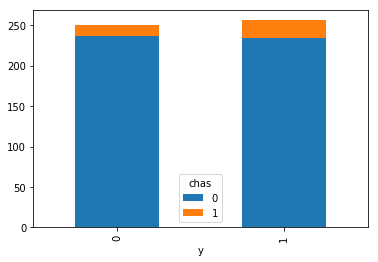

In [20]:
chasbar = Full_df1.groupby(['y', 'chas'])['y'].count().unstack('chas')

chasbar.plot(kind='bar', stacked=True)

Text(0, 0.5, 'Frequency of Crime')

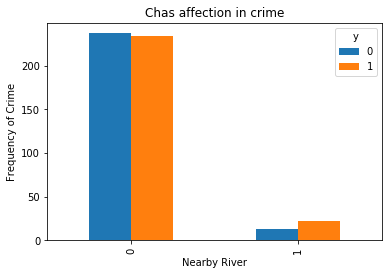

In [21]:
#Scatter3=Full_df1.plot.scatter(x='chas',y='y',c='purple')
#Scatter3
%matplotlib inline
pd.crosstab(Full_df1.chas,Full_df1.y).plot(kind='bar')
plt.title('Chas affection in crime')
plt.xlabel('Nearby River')
plt.ylabel('Frequency of Crime')

chas does not interfere with the outcome. Nearby river or not, crime rate is more or less equal. This might not be a good predictor.

*nox*

Text(0, 0.5, 'Frequency of Crime')

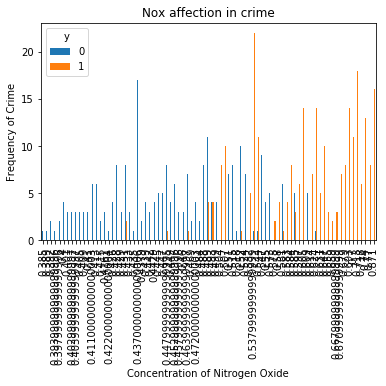

In [22]:
%matplotlib inline
pd.crosstab(Full_df1.nox,Full_df1.y).plot(kind='bar')
plt.title('Nox affection in crime')
plt.xlabel('Concentration of Nitrogen Oxide')
plt.ylabel('Frequency of Crime')

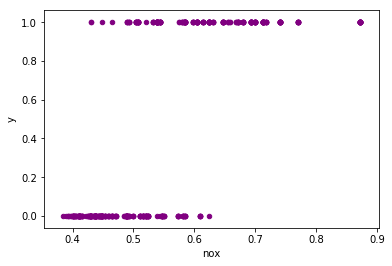

In [23]:
#noxbar = Full_df1.groupby(['y', 'nox'])['y'].count().unstack('nox')
#noxbar.plot(kind='bar', stacked=True)
Scatter4=Full_df1.plot.scatter(x='nox',y='y',c='purple')
Scatter4

Higher the nox value higher the crime. Might be a good predictor.

*rm*

Text(0, 0.5, 'Frequency of Crime')

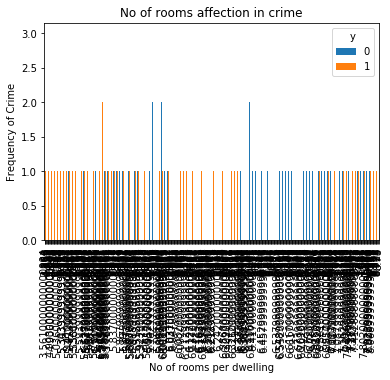

In [24]:
%matplotlib inline
pd.crosstab(Full_df1.rm,Full_df1.y).plot(kind='bar')
plt.title('No of rooms affection in crime')
plt.xlabel('No of rooms per dwelling')
plt.ylabel('Frequency of Crime')

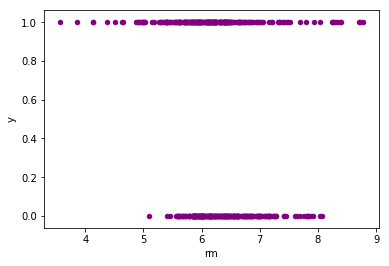

In [25]:
Scatter5=Full_df1.plot.scatter(x='rm',y='y',c='purple')
Scatter5

We cant infer any relation. Not a good predictor.

*age*

Text(0, 0.5, 'Frequency of Crime')

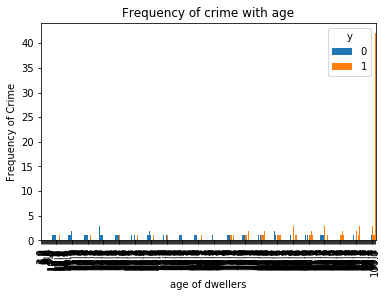

In [26]:
%matplotlib inline
pd.crosstab(Full_df1.age,Full_df1.y).plot(kind='bar')
plt.title('Frequency of crime with age')
plt.xlabel('age of dwellers')
plt.ylabel('Frequency of Crime')

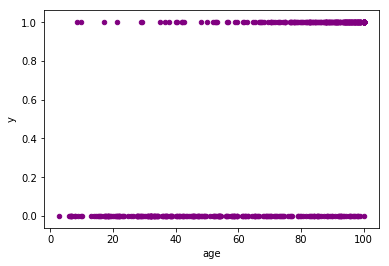

In [27]:
Scatter6=Full_df1.plot.scatter(x='age',y='y',c='purple')
Scatter6
#agebar=Full_df1.groupby(['y','age'])['y'].count().unstack('age')
#agebar.plot(kind='bar',stacked=True)

More the age higher the crime. Good predictor

*dis*

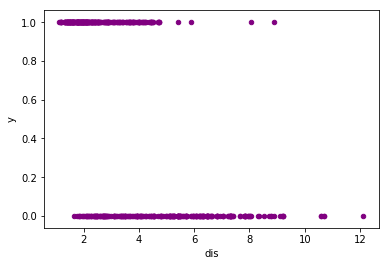

In [29]:
Scatter7=Full_df1.plot.scatter(x='dis',y='y',c='purple')
Scatter7
#disbar=Full_df1.groupby(['y','dis'])['y'].count().unstack('dis')
#disbar.plot(kind='bar',stacked=True)

Text(0, 0.5, 'Frequency of Crime')

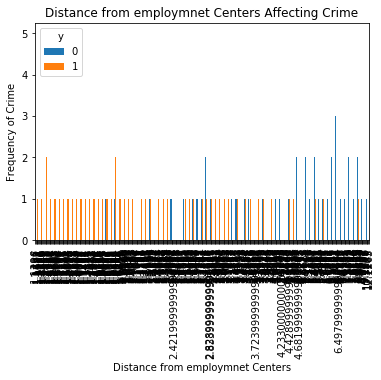

In [30]:
%matplotlib inline
pd.crosstab(Full_df1.dis,Full_df1.y).plot(kind='bar')
plt.title('Distance from employmnet Centers Affecting Crime')
plt.xlabel('Distance from employmnet Centers')
plt.ylabel('Frequency of Crime')

More the distance lesser the crime. Moderate Predictor

*rad*

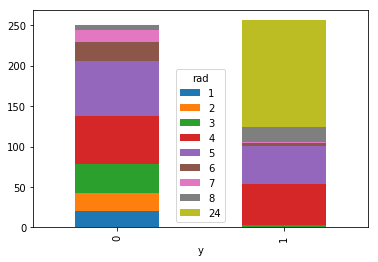

In [31]:
#Scatter8=Full_df1.plot.scatter(x='rad',y='y',c='purple')
#Scatter8
radbar=Full_df1.groupby(['y','rad'])['y'].count().unstack('rad')
radbar.plot(kind='bar',stacked=True)

Text(0, 0.5, 'Frequency of Crime')

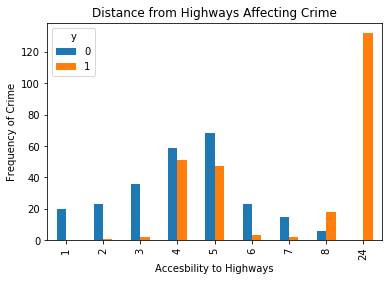

In [32]:
%matplotlib inline
pd.crosstab(Full_df1.rad,Full_df1.y).plot(kind='bar')
plt.title('Distance from Highways Affecting Crime')
plt.xlabel('Accesbility to Highways')
plt.ylabel('Frequency of Crime')

Farther the higher. Moderate Predictor.
24 seems intruging, but its not a outlier. So lets keep it. 

*tax*

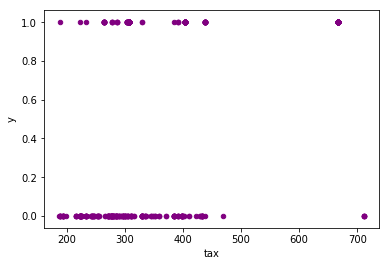

In [33]:
Scatter9=Full_df1.plot.scatter(x='tax',y='y',c='purple')
Scatter9
#taxbar=Full_df1.groupby(['y','tax'])['y'].count().unstack('tax')
#taxbar.plot(kind='bar',stacked=True)

Text(0, 0.5, 'Frequency of Crime')

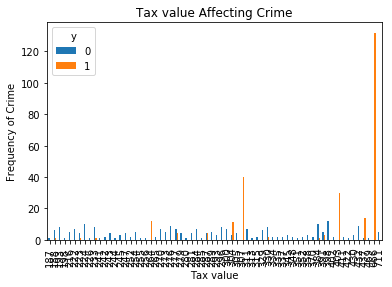

In [34]:
%matplotlib inline
pd.crosstab(Full_df1.tax,Full_df1.y).plot(kind='bar')
plt.title('Tax value Affecting Crime')
plt.xlabel('Tax value')
plt.ylabel('Frequency of Crime')

Higher the tax value, higher the crime. Might have outliers. Moderate/bad predictor
The two higher values must be taken care of as they seem to be outliers here. 

*ptratio*

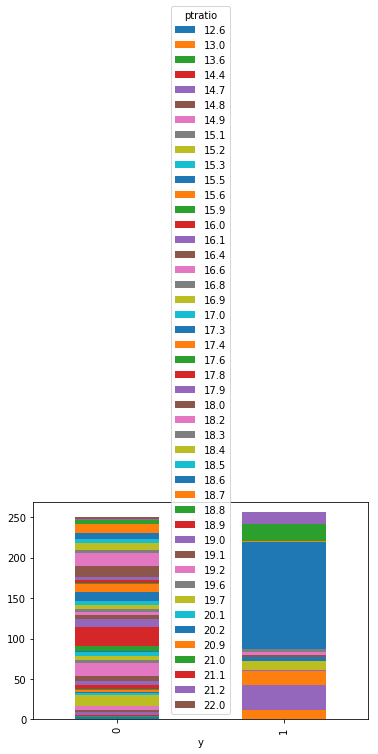

In [35]:
#Scatter10=Full_df1.plot.scatter(x='ptratio',y='y',c='purple')
#Scatter10
ptratiobar=Full_df1.groupby(['y','ptratio'])['y'].count().unstack('ptratio')
ptratiobar.plot(kind='bar',stacked=True)

Text(0, 0.5, 'Frequency of Crime')

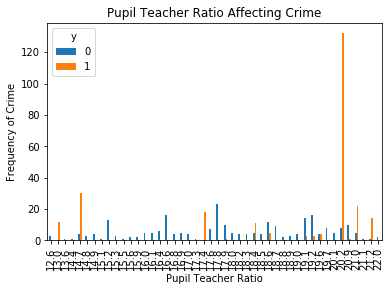

In [36]:
%matplotlib inline
pd.crosstab(Full_df1.ptratio,Full_df1.y).plot(kind='bar')
plt.title('Pupil Teacher Ratio Affecting Crime')
plt.xlabel('Pupil Teacher Ratio')
plt.ylabel('Frequency of Crime')

No pattern. Bad predictor

*black*

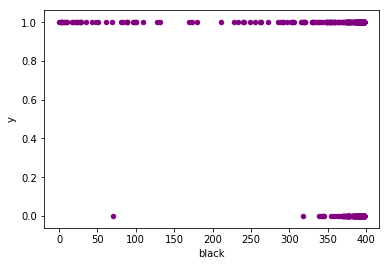

In [37]:
Scatter11=Full_df1.plot.scatter(x='black',y='y',c='purple')
Scatter11
#disbar=Full_df1.groupby(['y','dis'])['y'].count().unstack('dis')
#disbar.plot(kind='bar',stacked=True)

Text(0, 0.5, 'Frequency of Crime')

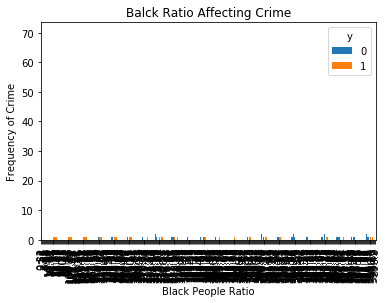

In [38]:
%matplotlib inline
pd.crosstab(Full_df1.black,Full_df1.y).plot(kind='bar')
plt.title('Balck Ratio Affecting Crime')
plt.xlabel('Black People Ratio')
plt.ylabel('Frequency of Crime')

No pattern. Bad predictor

*lstat*

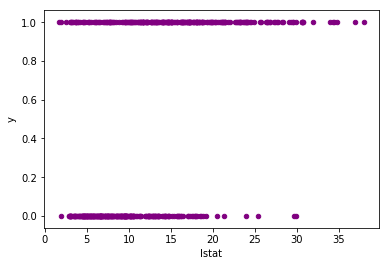

In [39]:
Scatter12=Full_df1.plot.scatter(x='lstat',y='y',c='purple')
Scatter12
#Lstatbar=Full_df1.groupby(['y','lstat'])['y'].count().unstack('lstat')
#Lstatbar.plot(kind='bar',stacked=True)

Text(0, 0.5, 'Frequency of Crime')

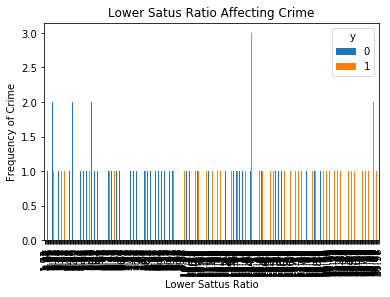

In [40]:
%matplotlib inline
pd.crosstab(Full_df1.lstat,Full_df1.y).plot(kind='bar')
plt.title('Lower Satus Ratio Affecting Crime')
plt.xlabel('Lower Sattus Ratio')
plt.ylabel('Frequency of Crime')

Increase in Lower status proportion increases crime. Good/Moderate predictor 

*medv*

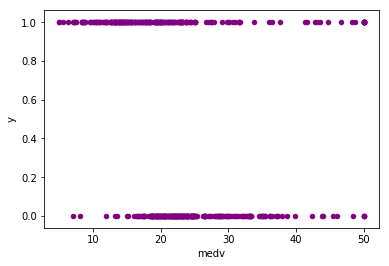

In [41]:
Scatter13=Full_df1.plot.scatter(x='medv',y='y',c='purple')
Scatter13
#medvbar=Full_df1.groupby(['y','medv'])['y'].count().unstack('medv')
#medvbar.plot(kind='bar',stacked=True)

Text(0, 0.5, 'Frequency of Crime')

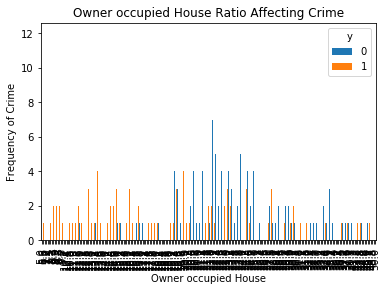

In [42]:
%matplotlib inline
pd.crosstab(Full_df1.medv,Full_df1.y).plot(kind='bar')
plt.title('Owner occupied House Ratio Affecting Crime')
plt.xlabel('Owner occupied House')
plt.ylabel('Frequency of Crime')

No pattern. BAd predictor. 

#Scale black and tax
#look at all the outilers and remove them

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#print(scaler.fit(Full_df1))
#print(scaler.transform(Full_df1))
scaled=scaler.fit_transform(X)
scaled_df=pd.DataFrame(scaled,columns=['zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv'])
scaled_df.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


In [44]:
#Collecting column names that I thought impact the outcome using above visualizations
cols_fromViz=['zn','indus','nox','age','dis','rad','lstat','tax']

Feature Selection

In [45]:
#using RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 8)
rfe = rfe.fit(scaled_df, Y_new)
print(rfe.support_)
print(rfe.ranking_)

[ True False False  True False  True  True  True False False  True  True
  True]
[1 4 2 1 3 1 1 1 5 6 1 1 1]


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs'

In [46]:
bfs=pd.DataFrame(list(scaled_df),list(rfe.ranking_))
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
print(bfs)

         0
1       zn
4    indus
2     chas
1      nox
3       rm
1      age
1      dis
1      rad
5      tax
6  ptratio
1    black
1    lstat
1     medv


In [47]:
#cols_fromRFE=['zn','chas','nox','rm','age','dis','rad','medv']
cols_fromRFE=['zn','nox','age','dis','rad','black','lstat','medv']

In [48]:
Drop=scaled_df[['indus','tax','ptratio','chas','rm']]
X_RFE=X.drop(Drop,axis=1)
X_RFE.shape

(506, 8)

In [49]:
#fitting logistic regression
import statsmodels.api as sm
logit_model=sm.Logit(Y_new,X_RFE)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.265110
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.617     
Dependent Variable: 0.0000           AIC:              284.2911  
Date:               2019-04-07 20:00 BIC:              318.1034  
No. Observations:   506              Log-Likelihood:   -134.15   
Df Model:           7                LL-Null:          -350.70   
Df Residuals:       498              LLR p-value:      1.8849e-89
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
zn        -0.0663     0.0221   -2.9995   0.0027   -0.1097   -0.0230
nox       17.9356     3.8562    4.6511   0.0000   10.3776

lstat and dis and age have p value that is lesser than 0.05 
So removing those and revaluating it.

In [50]:
X_RFE2=X_RFE.drop(['lstat','dis','age'],axis=1)
X_RFE2.shape

(506, 5)

In [51]:
#fitting logistic regression
import statsmodels.api as sm
logit_model=sm.Logit(Y_new,X_RFE2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.270267
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.610     
Dependent Variable: 0.0000           AIC:              283.5102  
Date:               2019-04-07 20:00 BIC:              304.6428  
No. Observations:   506              Log-Likelihood:   -136.76   
Df Model:           4                LL-Null:          -350.70   
Df Residuals:       501              LLR p-value:      2.6216e-91
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
zn        -0.0553     0.0187   -2.9605   0.0031   -0.0919   -0.0187
nox       18.0434     2.5421    7.0977   0.0000   13.0609

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_RFE2, Y_new, test_size=0.3, random_state=68)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
y_predRFE2 = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


Now lets predict for the features that I thought are important by visualization

In [54]:
X_Viz=scaled_df.drop(['chas','rm','ptratio','black','medv'],axis=1)
X_Viz.shape

(506, 8)

In [55]:
#fitting logistic regression
import statsmodels.api as sm
logit_model=sm.Logit(Y_new,X_Viz)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.300651
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.566     
Dependent Variable: 0.0000           AIC:              320.2587  
Date:               2019-04-07 20:00 BIC:              354.0710  
No. Observations:   506              Log-Likelihood:   -152.13   
Df Model:           7                LL-Null:          -350.70   
Df Residuals:       498              LLR p-value:      9.8149e-82
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
zn        -5.9044     1.9601   -3.0123   0.0026   -9.7462   -2.0626
indus     -1.3027     0.9172   -1.4202   0.1555   -3.1004 

dropping indus,age,lstat since it has high p value

In [56]:
X_Viz2=X_Viz.drop(['indus','age','lstat'],axis=1)
X_Viz2.shape

(506, 5)

In [57]:
#fitting logistic regression
import statsmodels.api as sm
logit_model=sm.Logit(Y_new,X_Viz2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.305359
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.559     
Dependent Variable: 0.0000           AIC:              319.0233  
Date:               2019-04-07 20:00 BIC:              340.1560  
No. Observations:   506              Log-Likelihood:   -154.51   
Df Model:           4                LL-Null:          -350.70   
Df Residuals:       501              LLR p-value:      1.2379e-83
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
zn        -5.5124     1.8183   -3.0317   0.0024   -9.0761   -1.9487
nox        4.0681     0.9277    4.3849   0.0000    2.2497 

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_Viz2, Y_new, test_size=0.3,random_state=68)
logreg1 = LogisticRegression()
logreg1.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
y_predViz2 = logreg1.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg1.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [60]:
X_Forward=scaled_df[['nox','zn']]
X_Forward.shape

(506, 2)

In [61]:
logit_model=sm.Logit(Y_new,X_Forward)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.451306
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.349     
Dependent Variable: 0.0000           AIC:              460.7218  
Date:               2019-04-07 20:00 BIC:              469.1749  
No. Observations:   506              Log-Likelihood:   -228.36   
Df Model:           1                LL-Null:          -350.70   
Df Residuals:       504              LLR p-value:      3.7674e-55
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025     0.975]
-------------------------------------------------------------------
nox       2.9800     0.3061    9.7365   0.0000     2.3801    3.5799
zn       -9.7886     1.3976   -7.0040   0.0000   -12.5278 

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_Forward, Y_new, test_size=0.3,random_state=68)
logreg3 = LogisticRegression()
logreg3.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
y_predForward = logreg3.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg3.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


After combining all values we select nox,zn to be most influential. 

Backward SElection

In [64]:
X_Backward=scaled_df[['rad','age']]
X_Backward.shape

(506, 2)

In [65]:
logit_model=sm.Logit(Y_new,X_Backward)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.563222
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.187     
Dependent Variable: 0.0000           AIC:              573.9802  
Date:               2019-04-07 20:00 BIC:              582.4333  
No. Observations:   506              Log-Likelihood:   -284.99   
Df Model:           1                LL-Null:          -350.70   
Df Residuals:       504              LLR p-value:      2.0104e-30
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
rad        3.4586     0.4419    7.8260   0.0000    2.5924    4.3247
age       -0.8192     0.2052   -3.9922   0.0001   -1.2214 

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_Backward, Y_new, test_size=0.3,random_state=68)
logreg4 = LogisticRegression()
logreg4.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
y_predBackward = logreg4.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg4.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


With backward we skim the features to rad and age for 86% accuracy.

So choosing forward since it gives the best accuracy.

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predForward)
print(confusion_matrix)

[[60 11]
 [ 8 73]]


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predForward))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        71
           1       0.87      0.90      0.88        81

   micro avg       0.88      0.88      0.88       152
   macro avg       0.88      0.87      0.87       152
weighted avg       0.88      0.88      0.87       152



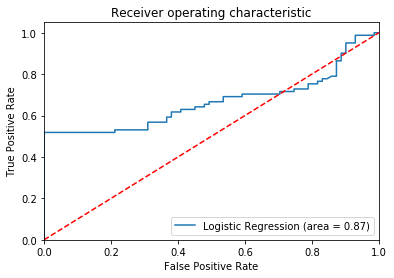

In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_predForward)
fpr, tpr, thresholds = roc_curve(y_test, logreg3.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

We have a model that predicts with an accuracy of 87%

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_Forward, Y_new, test_size=0.3,random_state=68)
logreg3 = LogisticRegression()
logreg3.fit(X_train, y_train)
y_scores= logreg3.predict_proba(X_test)[:,1]
y_scores

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.94812305, 0.90183954, 0.72371054, 0.41282686, 0.75840161,
       0.87830841, 0.87830841, 0.18263476, 0.18173657, 0.12829766,
       0.2975353 , 0.65137467, 0.22269528, 0.2975353 , 0.54454056,
       0.55350301, 0.02578161, 0.90183954, 0.65137467, 0.92714386,
       0.73560978, 0.71395635, 0.98408267, 0.92714386, 0.75840161,
       0.4245764 , 0.18263476, 0.88705157, 0.98408267, 0.77353842,
       0.82024234, 0.65683461, 0.88705157, 0.65954921, 0.9070524 ,
       0.47228982, 0.55350301, 0.54454056, 0.24741373, 0.4245764 ,
       0.18928171, 0.2975353 , 0.71395635, 0.38107018, 0.98408267,
       0.02357566, 0.72274059, 0.54454056, 0.85906918, 0.50845936,
       0.75840161, 0.24741373, 0.1056741 , 0.03627666, 0.64862962,
       0.03117429, 0.27534744, 0.4245764 , 0.9070524 , 0.38107018,
       0.72371054, 0.84222159, 0.92714386, 0.37822839, 0.27294638,
       0.69384293, 0.05035794, 0.03343667, 0.75840161, 0.88705157,
       0.75840161, 0.98408267, 0.90183954, 0.69384293, 0.39251

In [77]:
#p, r, thresholds = precision_recall_curve(y_test, y_scores)
def adjusted_classes(x, t):
     return [1 if y >= t else 0 for y in x]
#def precision_recall_threshold(p, r, thresholds, t=0.5):
y_pred_adj = adjusted_classes(y_scores, 0.42)

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_adj)
print(confusion_matrix)
print(classification_report(y_test, y_pred_adj))

[[52 19]
 [ 1 80]]
              precision    recall  f1-score   support

           0       0.98      0.73      0.84        71
           1       0.81      0.99      0.89        81

   micro avg       0.87      0.87      0.87       152
   macro avg       0.89      0.86      0.86       152
weighted avg       0.89      0.87      0.87       152



In [79]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict_proba(X_test)
#preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_adj)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.8600243435924186

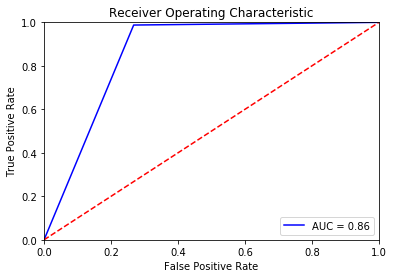

In [80]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

So our final model after hyperparameter tuning predicts with an accuracy of 86%. 

#Notes#
x_t1=np.array(lr_prob)
x_t1[x_t1>0.5]=1
x_t1[x_t1<0.5]=0

#x_t1=x_t1.astype(int)
x_t1
x_t1=x_t1.astype(int)
optimal_idx = np.argmax(tpr+(1-fpr))
optimal_threshold = thresholds[optimal_idx]